#### Kirchhoff Approximation

the object in an optical system is modeled as an infinitely thin film with a complex transmission function T(x,y).

$$
E_x'(x,y) = T(x,y) \cdot E_x(x,y) \\
E_y'(x,y) = T(x,y) \cdot E_y(x,y) \\
E_z'(x,y) = T(x,y) \cdot E_z(x,y)
$$

---

- kirchhoff approximation 支持两种传递函数的构建, 分别是 binary_mask 和 thin_mask.  
- 他们二者在整网格点时结果完全一致. (参考下面 cd = 8 的结果)
- thin_mask 目前不支持 1d, 在 2d 复杂图形时有更快的速度(待详细测试)
- thin_mask 支持 sub-pixel 精度 
- 请注意，几何图形的单位是 物理尺寸/dbu 



* grid info                           
----------------------------------------
tilesize      :  [16,16]              
spatial start :  [-8,-8]              
spatial step  :  [1,1]                
fourier start :  [0,0]                
fourier step  :  [0.902778,0.902778]  
coords place  :  |*--|corner          

* cd=7
[[[-3500000,-3500000],[-3500000,3500000],[3500000,3500000],[3500000,-3500000]]]
    binary mask


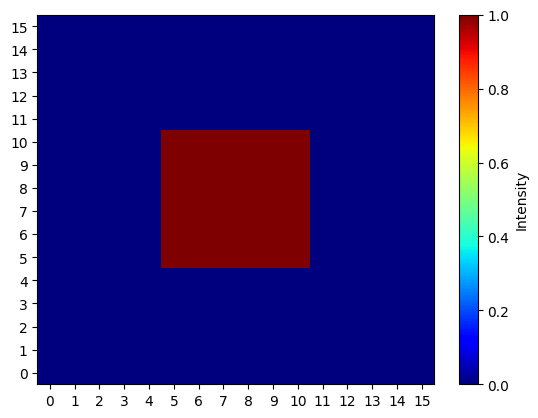

    thin mask


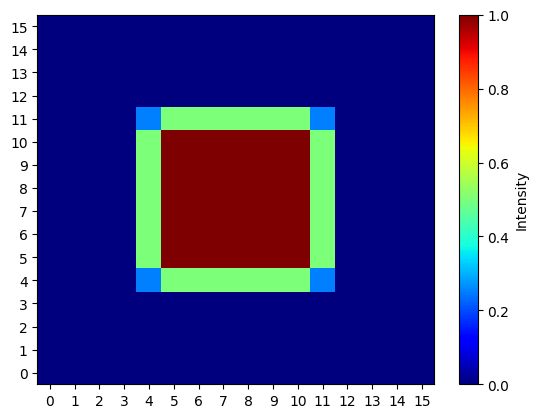

* cd=8
[[[-4000000,-4000000],[-4000000,4000000],[4000000,4000000],[4000000,-4000000]]]
    binary mask


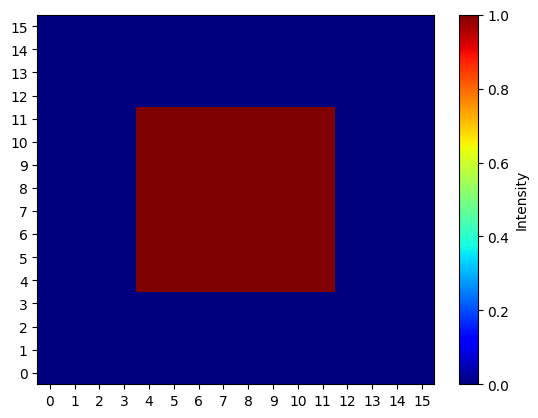

    thin mask


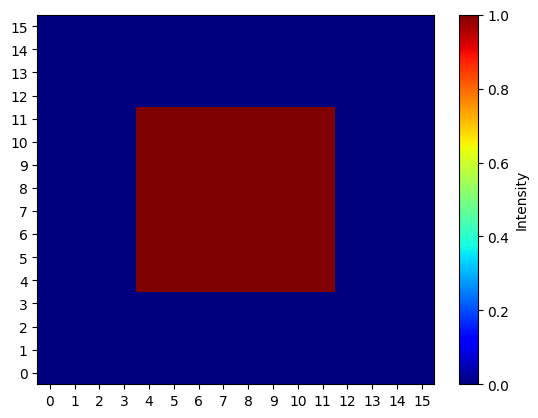

* cd=9
[[[-4500000,-4500000],[-4500000,4500000],[4500000,4500000],[4500000,-4500000]]]
    binary mask


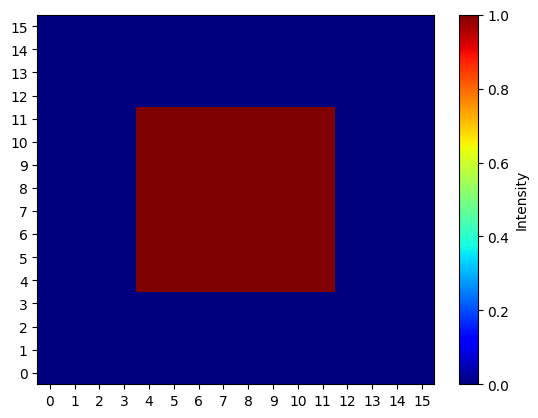

    thin mask


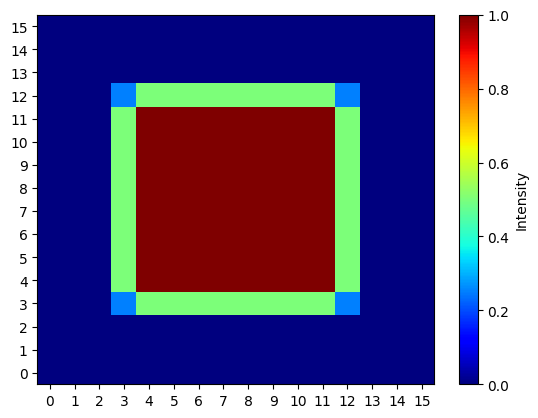

In [1]:
%matplotlib inline
from simulation import *
from math import *

wavelength = 13.0
NA = 0.9
pitch = 16
dx = 1
dbu = 1e-6
size = int(ceil(pitch / dx))
grid_info_2d = grid_info_2d_s.create_grid_info_bloch_mode([size, size], wavelength, 0.0, NA, [[-pitch/2, -pitch/2], [pitch/2, pitch/2]], dbu)
print(grid_info_2d)


background = 0 + 0j
absorber = 1 + 0j
for cd in [7,8,9]:
    print(f"* cd={cd}")
    geo = geo_manager([
        [
            [int(-cd/2/grid_info_2d.dbu), int(-cd/2/grid_info_2d.dbu)], 
            [int(-cd/2/grid_info_2d.dbu), int(cd/2/grid_info_2d.dbu)], 
            [int(cd/2/grid_info_2d.dbu), int(cd/2/grid_info_2d.dbu)], 
            [int(cd/2/grid_info_2d.dbu), int(-cd/2/grid_info_2d.dbu)]
        ]
    ])
    print(geo.polys)
    print("    binary mask")
    grid_info_2d.display(binary_mask.create(background, absorber, grid_info_2d, geo.get_vertex()))
    print("    thin mask")
    grid_info_2d.display(thin_mask.create(background, absorber, grid_info_2d, geo.get_all_edges()))


    binary mask


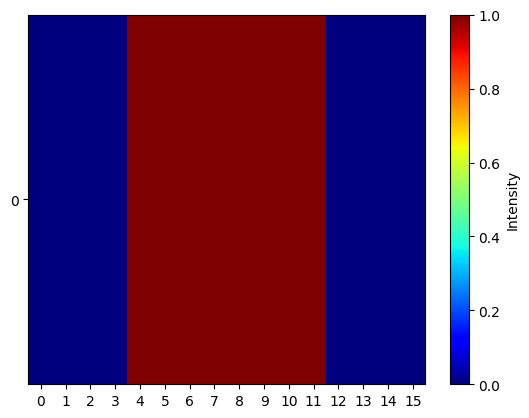

In [2]:
grid_info_1d = grid_info_2d_s.create_grid_info_bloch_mode([size, 1], wavelength, 0.0, NA, [[-pitch/2, 0], [pitch/2, 0]], dbu)
print("    binary mask")
grid_info_1d.display(binary_mask.create(background, absorber, grid_info_1d, geo.get_vertex()))

In [3]:
# TODO : fix crash : thin mask in 1d
# print("    thin mask")
# grid_info_1d.display(thin_mask.create(background, absorber, grid_info_1d, geo.get_all_edges()))